## Librerías

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss

import lightgbm as lgb

## Carga de datos

Validamos los archivos

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Cargamos los datasets

In [ ]:
import pandas as pd
df_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/datos/fraudTrain.csv')

Validamos el contenido

In [ ]:
df_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
df_train.shape

(1296675, 23)

## Preprocesamiento

Eliminamos columna innecesaria

In [ ]:
df_train.drop(columns=['Unnamed: 0'], inplace=True)

Tomamos una muestra basados en una sola tarjeta

In [ ]:
df_train[df_train.cc_num == 2703186189652095]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1565,2019-01-01 16:53:34,2703186189652095,fraud_Ruecker-Mayert,kids_pets,114.79,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,fadb4dafef079a1a0381360bbe80b3c0,1325436814,35.083586,-80.625951,0
2299,2019-01-01 23:02:37,2703186189652095,fraud_Pacocha-Weissnat,kids_pets,16.55,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1318500aff9644abe2e4a8c562eab7bc,1325458957,35.532409,-82.170017,0
3606,2019-01-03 01:40:38,2703186189652095,fraud_Kuhn LLC,misc_net,27.70,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,bcc4f7493418d8937162bfec626216cc,1325554838,35.315851,-80.666723,0
4227,2019-01-03 15:24:11,2703186189652095,"fraud_Nicolas, Hills and McGlynn",entertainment,43.72,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0f63b8ad4ac9bc6b77e60197ffa6aa24,1325604251,36.956094,-80.343520,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293109,2020-06-20 02:02:33,2703186189652095,fraud_Herzog Ltd,misc_pos,87.71,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,6b24be71de6a8532af5c0e12fa36d1f2,1371693753,36.530755,-80.966859,0
1294921,2020-06-20 20:57:37,2703186189652095,fraud_Harris Group,food_dining,8.76,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,be44c76826f63a4297ce912c62be684b,1371761857,36.741975,-82.026691,0
1295472,2020-06-21 01:43:26,2703186189652095,fraud_Huels-Nolan,gas_transport,50.45,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,70c655c5e124eb550fbb5b4a8311c4a2,1371779006,35.928092,-81.267283,0
1295630,2020-06-21 03:09:56,2703186189652095,fraud_Rowe-Vandervort,grocery_net,47.42,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,116e03dc6129efa0f398ec48efd9192d,1371784196,36.821580,-80.601627,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
df_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trans_date_trans_time,1296675,1274791,2020-06-02 12:47:07,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1.29668e+06,NaN,NaN,NaN,4.17192e+17,1.30881e+18,6.04162e+10,1.80043e+14,3.52142e+15,4.64226e+15,4.99235e+18
merchant,1296675,693,fraud_Kilback LLC,4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1296675,14,gas_transport,131659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1.29668e+06,NaN,NaN,NaN,70.351,160.316,1,9.65,47.52,83.14,28948.9
first,1296675,352,Christopher,26669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1296675,481,Smith,28794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1296675,2,F,709863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1296675,983,864 Reynolds Plains,3123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1296675,894,Birmingham,5617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos diversidad de información en los datos

In [ ]:
for col in df_train.columns:
    valores_unicos = len(df_train[col].unique())
    print("="*10)
    print("Columna: {} \nValores unicos: {} \nTipo: {}".format(col, valores_unicos, df_train[col].dtype))

Columna: trans_date_trans_time 
Valores unicos: 1274791 
Tipo: object
Columna: cc_num 
Valores unicos: 983 
Tipo: int64
Columna: merchant 
Valores unicos: 693 
Tipo: object
Columna: category 
Valores unicos: 14 
Tipo: object
Columna: amt 
Valores unicos: 52928 
Tipo: float64
Columna: first 
Valores unicos: 352 
Tipo: object
Columna: last 
Valores unicos: 481 
Tipo: object
Columna: gender 
Valores unicos: 2 
Tipo: object
Columna: street 
Valores unicos: 983 
Tipo: object
Columna: city 
Valores unicos: 894 
Tipo: object
Columna: state 
Valores unicos: 51 
Tipo: object
Columna: zip 
Valores unicos: 970 
Tipo: int64
Columna: lat 
Valores unicos: 968 
Tipo: float64
Columna: long 
Valores unicos: 969 
Tipo: float64
Columna: city_pop 
Valores unicos: 879 
Tipo: int64
Columna: job 
Valores unicos: 494 
Tipo: object
Columna: dob 
Valores unicos: 968 
Tipo: object
Columna: trans_num 
Valores unicos: 1296675 
Tipo: object
Columna: unix_time 
Valores unicos: 1274823 
Tipo: int64
Columna: merch_lat

In [ ]:
df_train.city_pop.value_counts()

606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
4046          7
1888          7
3631          7
198659        7
242803        7
Name: city_pop, Length: 879, dtype: int64

In [ ]:
np.array(df_train.city_pop)

array([3495,  149, 4154, ...,  899, 1126,  218])

In [ ]:
np.array(df_train.city_pop).reshape(-1,1)

array([[3495],
       [ 149],
       [4154],
       ...,
       [ 899],
       [1126],
       [ 218]])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(df_train.city_pop).reshape(-1,1))
df_train['city_pop_norm'] = pd.DataFrame(x_scaled)

Encoding

In [ ]:
df_train.state.head()

0    NC
1    WA
2    ID
3    MT
4    VA
Name: state, dtype: object

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_train.state)
df_train['state_encode'] = le.transform(df_train.state)

In [ ]:
df_train.state_encode.head()

0    27
1    47
2    13
3    26
4    45
Name: state_encode, dtype: int64

Calculo de la edad

In [ ]:
df_train['edad'] = 2021-df_train.dob.astype(str).str[:4].astype(int)

In [ ]:
df_train.groupby(['first', 'last']).size()

first    last    
Aaron    Murray      2050
         Pena        1476
         Rogers       508
         Stewart      537
Adam     Keller       521
                     ... 
William  Thompson    2052
Willie   Jordan      1038
Xavier   Beltran     1516
Zachary  Allen       1523
         Boone        495
Length: 973, dtype: int64

Existen menos personas que los numeros de tarjeta de credito, por lo que podría indicar que una persona tiene 2 tarjetas de credito

In [ ]:
len(df_train.cc_num.unique())

983

In [ ]:
len(df_train.merchant.unique())

693

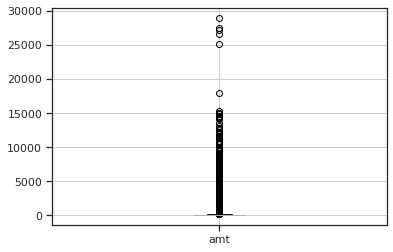

In [ ]:
df_train.boxplot(column=['amt']);

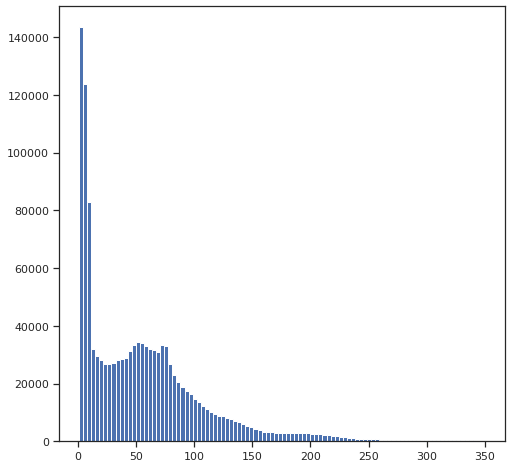

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df_train[df_train.amt < 350].amt, bins = 100)
plt.show()

In [ ]:
df_train.gender.value_counts()

F    709863
M    586812
Name: gender, dtype: int64

In [ ]:
df_train.gender.replace({'F':1, 'M':0}, inplace=True)

In [ ]:
df_train.gender.value_counts()

1    709863
0    586812
Name: gender, dtype: int64

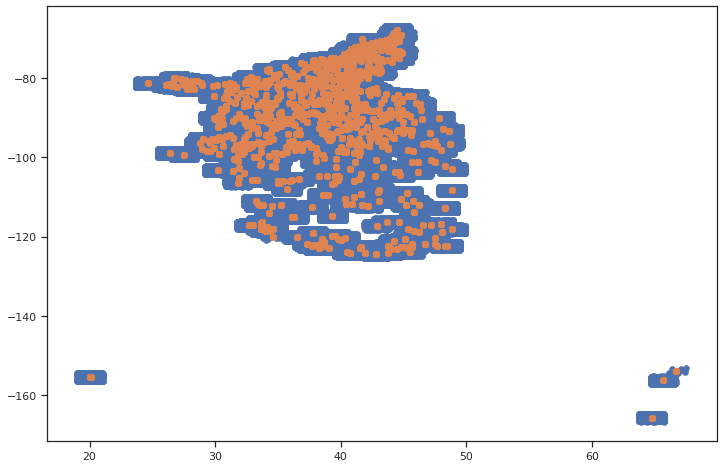

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df_train.merch_lat, df_train.merch_long, linewidth = 0.5)
plt.scatter(df_train.lat, df_train.long, linewidth = 1)
plt.show()

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    R = 6373
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [ ]:
df_train['distance'] = df_train.apply(lambda row: distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

Análisis del target

In [ ]:
df_train.is_fraud.value_counts(normalize=True, dropna=False).to_list()

[0.9942113482561166, 0.005788651743883394]

In [ ]:
df_train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

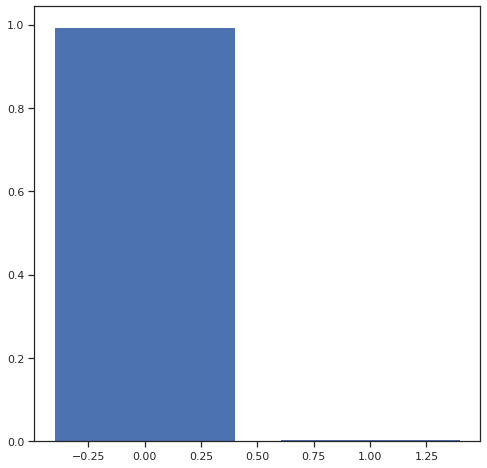

In [ ]:
plt.figure(figsize=(8,8))
plt.bar([0,1], df_train.is_fraud.value_counts(normalize=True, dropna=False).to_list() )
plt.show()

## Train

Separación de data

In [ ]:
X = df_train[['amt', 'zip', 'distance', 'unix_time', 'gender', 'state_encode', 'edad', 'city_pop_norm']]
y = df_train['is_fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Random Forest

In [ ]:
%%time
clf = RandomForestClassifier(n_estimators=100,
                             max_features = 'sqrt',
                             verbose=1,
                             n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min


CPU times: user 7min 15s, sys: 383 ms, total: 7min 16s
Wall time: 3min 41s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.7min finished


In [ ]:
probs = clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    4.6s finished


In [ ]:
pd.DataFrame(probs).describe()

,0
count,389003.000000
mean,0.006021
std,0.048841
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


AUC

In [ ]:
roc = roc_auc_score(y_test, probs)
roc

0.9839713094529225

In [ ]:
gini = 2 * roc - 1
gini

0.9679426189058451

In [ ]:
logloss_score = log_loss(y_test, probs)
logloss_score

0.014589667463769869

Punto de corte

In [ ]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [ ]:
Find_Optimal_Cutoff(y_test, probs)

[0.02]

In [ ]:
numeric = np.where(probs > 0.02, 1, 0)
f1_score(y_test, numeric)

0.3129142690654818

In [ ]:
def f1_score_iter(y_test, y_pred):
    axis_x = []
    axis_y = []

    for i in np.arange(0.1, 0.9, 0.05):

        numeric = np.where(y_pred > i, 1, 0)

        f1 = f1_score(y_test, numeric)

        axis_x.append(i)
        axis_y.append(f1)

        print("Cutoff: {:.2f} - F1 score: {:.4f}".format(i, f1))


    plt.figure(figsize=(8,8))
    plt.plot(axis_x, axis_y)
    plt.grid()
    plt.show()

Cutoff: 0.10 - F1 score: 0.5556
Cutoff: 0.15 - F1 score: 0.6096
Cutoff: 0.20 - F1 score: 0.6375
Cutoff: 0.25 - F1 score: 0.6539
Cutoff: 0.30 - F1 score: 0.6614
Cutoff: 0.35 - F1 score: 0.6559
Cutoff: 0.40 - F1 score: 0.6464
Cutoff: 0.45 - F1 score: 0.6337
Cutoff: 0.50 - F1 score: 0.6150
Cutoff: 0.55 - F1 score: 0.5800
Cutoff: 0.60 - F1 score: 0.5378
Cutoff: 0.65 - F1 score: 0.4949
Cutoff: 0.70 - F1 score: 0.4275
Cutoff: 0.75 - F1 score: 0.3539
Cutoff: 0.80 - F1 score: 0.2666
Cutoff: 0.85 - F1 score: 0.1798


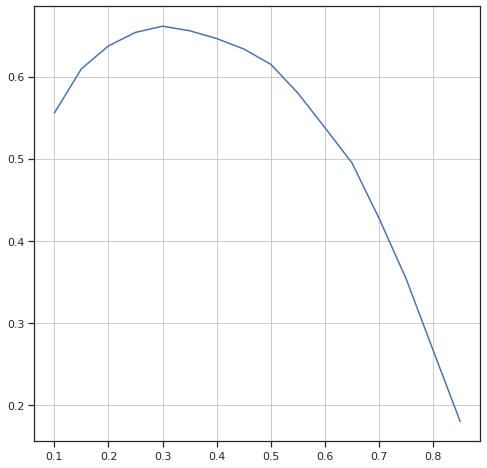

In [ ]:
f1_score_iter(y_test, probs)

In [ ]:
numeric = np.where(probs > 0.3, 1, 0)
f1_score(y_test, numeric)

0.6614384942863545

In [ ]:
confusion_matrix(y_test, numeric)

array([[386016,    702],
       [   809,   1476]])

# LGBM

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'f1',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [ ]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat), True

In [ ]:
evals_result = {}


In [ ]:
%%time
model = lgb.train(parameters,
                  train_data,
                  valid_sets=test_data,
                  num_boost_round=2000,
                  early_stopping_rounds=100,
                  feval=lgb_f1_score)

[1]	valid_0's f1: 0.0213721
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's f1: 0.0233014
[3]	valid_0's f1: 0.0528313
[4]	valid_0's f1: 0.057501
[5]	valid_0's f1: 0.0542427
[6]	valid_0's f1: 0.0652253
[7]	valid_0's f1: 0.0609981
[8]	valid_0's f1: 0.0694961
[9]	valid_0's f1: 0.0668092
[10]	valid_0's f1: 0.0905921
[11]	valid_0's f1: 0.0876774
[12]	valid_0's f1: 0.0932154
[13]	valid_0's f1: 0.0925643
[14]	valid_0's f1: 0.0955772
[15]	valid_0's f1: 0.0908282
[16]	valid_0's f1: 0.0904498
[17]	valid_0's f1: 0.0899941
[18]	valid_0's f1: 0.0906062
[19]	valid_0's f1: 0.0900247
[20]	valid_0's f1: 0.0915964
[21]	valid_0's f1: 0.0906201
[22]	valid_0's f1: 0.0912963
[23]	valid_0's f1: 0.0907436
[24]	valid_0's f1: 0.0919268
[25]	valid_0's f1: 0.0915264
[26]	valid_0's f1: 0.0916183
[27]	valid_0's f1: 0.0923578
[28]	valid_0's f1: 0.0935239
[29]	valid_0's f1: 0.0938285
[30]	valid_0's f1: 0.0980377
[31]	valid_0's f1: 0.0989077
[32]	valid_0's f1: 0.100447
[33]	valid_0's f1: 0

In [ ]:
probs = model.predict(X_test)

In [ ]:
roc = roc_auc_score(y_test, probs)
roc

0.9785503202775966

In [ ]:
gini = 2 * roc - 1
gini

0.9571006405551932

In [ ]:
logloss_score = log_loss(y_test, probs)
logloss_score

0.08392901639345791

In [ ]:
Find_Optimal_Cutoff(y_test, probs)

[0.16650803410491735]

Cutoff: 0.10 - F1 score: 0.0930
Cutoff: 0.15 - F1 score: 0.1126
Cutoff: 0.20 - F1 score: 0.1311
Cutoff: 0.25 - F1 score: 0.1491
Cutoff: 0.30 - F1 score: 0.1671
Cutoff: 0.35 - F1 score: 0.1857
Cutoff: 0.40 - F1 score: 0.2043
Cutoff: 0.45 - F1 score: 0.2252
Cutoff: 0.50 - F1 score: 0.2452
Cutoff: 0.55 - F1 score: 0.2663
Cutoff: 0.60 - F1 score: 0.2897
Cutoff: 0.65 - F1 score: 0.3142
Cutoff: 0.70 - F1 score: 0.3445
Cutoff: 0.75 - F1 score: 0.3741
Cutoff: 0.80 - F1 score: 0.4081
Cutoff: 0.85 - F1 score: 0.4469


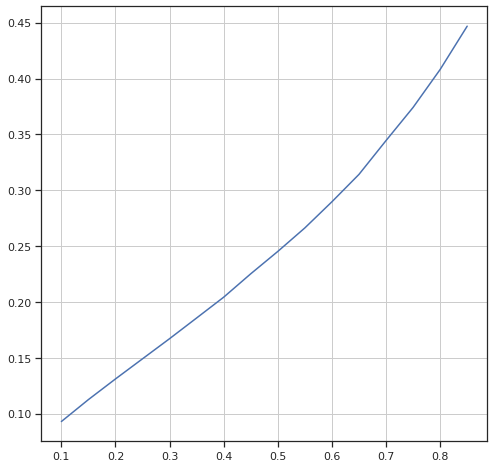

In [ ]:
f1_score_iter(y_test, probs)

In [ ]:
numeric = np.where(probs > 0.25, 1, 0)
f1_score(y_test, numeric)

0.1491199537388413

In [ ]:
confusion_matrix(y_test, numeric)

array([[363397,  23321],
       [   222,   2063]])

In [ ]:
imp_variables = pd.DataFrame(sorted(zip(model.feature_importance(),X.columns)), columns=['Importancia','Variable'])

In [ ]:
imp_variables

,Importancia,Variable
0,1139,gender
1,6504,distance
2,6859,amt
3,7304,state_encode
4,8296,unix_time
5,8341,zip
6,9744,edad
7,11813,city_pop_norm


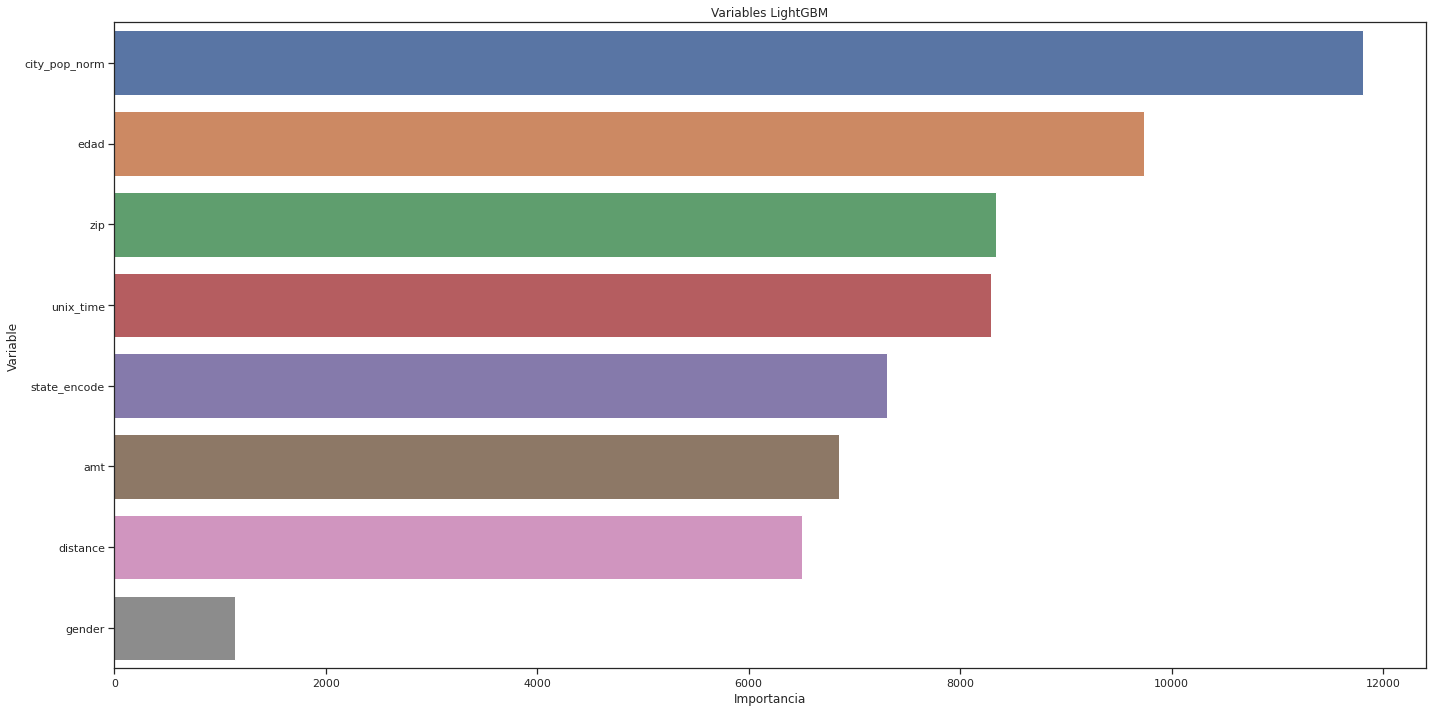

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Importancia", y="Variable", data=imp_variables.sort_values(by="Importancia", ascending=False))
plt.title('Variables LightGBM')
plt.tight_layout()
plt.show()